<a href="https://colab.research.google.com/github/weisurya/fastai-practical-deep-learning-for-coders/blob/main/04_mnist_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 6.8MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 194kB 36.2MB/s 
     |████████████████████████████████| 1.2MB 39.0MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

In [4]:
path.ls()

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [5]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [6]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [7]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [12]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [13]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [16]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [17]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

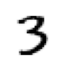

In [18]:
show_image(three_tensors[1])

In [19]:
stacked_sevens = torch.stack(seven_tensors).float() / 255
stacked_threes = torch.stack(three_tensors).float() / 255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [20]:
len(stacked_threes.shape)

3

In [21]:
stacked_threes.ndim

3

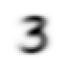

In [29]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

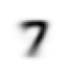

In [24]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

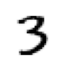

In [30]:
a_3 = stacked_threes[1]
show_image(a_3)

In [31]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3) ** 2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [33]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [34]:
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3.float(), mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [35]:
data = [[1,2,3], [4,5,6]]
arr = array(data)
tns = tensor(data)

In [36]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [37]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [38]:
tns[1]

tensor([4, 5, 6])

In [39]:
tns[:, 1]

tensor([2, 5])

In [42]:
tns[1,1:3]

tensor([5, 6])

In [43]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [44]:
tns.type()

'torch.LongTensor'

In [45]:
tns * 1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [46]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float() / 255

valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float() / 255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [47]:
def mnist_distance(a,b): return (a-b).abs().mean((-1, -2))

In [48]:
mnist_distance(a_3, mean3)

tensor(0.1114)

In [49]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1824, 0.1252, 0.1484,  ..., 0.1245, 0.1296, 0.1113]),
 torch.Size([1010]))

In [50]:
tensor([1,2,3]) + tensor(1)

tensor([2, 3, 4])

In [53]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

In [54]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [55]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [56]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [57]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = is_3(valid_7_tens).float().mean()

accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s)/2

(tensor(0.9168), tensor(0.0146), tensor(0.4657))

In [58]:
def pr_eight(x, w): return (x*w).sum()

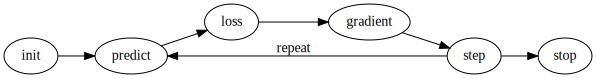

In [59]:
gv('''
init -> predict -> loss -> gradient -> step -> stop
step -> predict[label=repeat]
''')

In [60]:
def f(x): return x ** 2

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


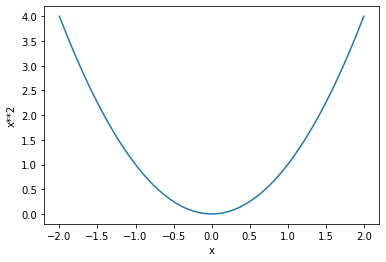

In [61]:
plot_function(f, 'x', 'x**2')

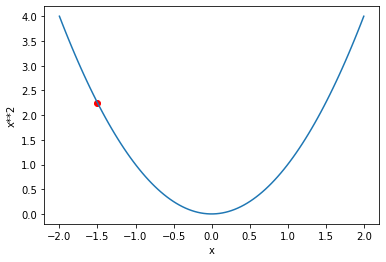

In [62]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red')

In [64]:
xt = tensor(3.).requires_grad_()

In [65]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [66]:
yt.backward()

In [68]:
xt.grad

tensor(6.)

In [70]:
xt = tensor([3., 4., 10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [71]:
def f(x): return (x ** 2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [72]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [74]:
time = torch.arange(0, 20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

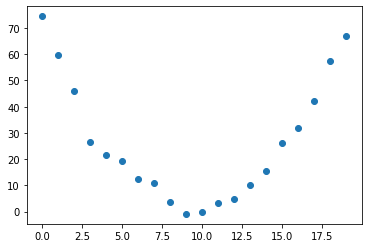

In [75]:
speed = torch.randn(20) * 3 + .75 * (time - 9.5) ** 2 + 1
plt.scatter(time, speed)

In [76]:
def f(t, params):
    a,b,c = params
    return a * (t**2) + (b*t) + c

In [77]:
def mse(preds, targets): return ((preds - targets) ** 2).mean().sqrt()

In [78]:
params = torch.randn(3).requires_grad_()

In [79]:
orig_params = params.clone()

In [80]:
preds = f(time, params)

In [83]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]

    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300, 100)

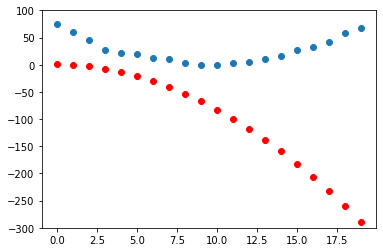

In [84]:
show_preds(preds)

In [85]:
loss = mse(preds, speed)
loss

tensor(160.6979, grad_fn=<SqrtBackward>)

In [86]:
loss.backward()
params.grad

tensor([-165.5151,  -10.6402,   -0.7900])

In [87]:
params.grad * 1e-5

tensor([-1.6552e-03, -1.0640e-04, -7.8996e-06])

In [88]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [89]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [90]:
preds = f(time, params)
mse(preds, speed)

tensor(160.4228, grad_fn=<SqrtBackward>)

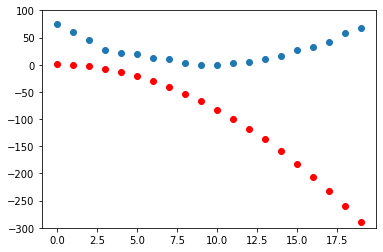

In [91]:
show_preds(preds)

In [92]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None

    if prn: print(loss.item())

    return preds

In [93]:
for i in range(10): apply_step(params)

160.42279052734375
160.14772033691406
159.87269592285156
159.59768676757812
159.3227081298828
159.04774475097656
158.7728271484375
158.4979248046875
158.22305297851562
157.9481964111328


In [94]:
params = orig_params.detach().requires_grad_()

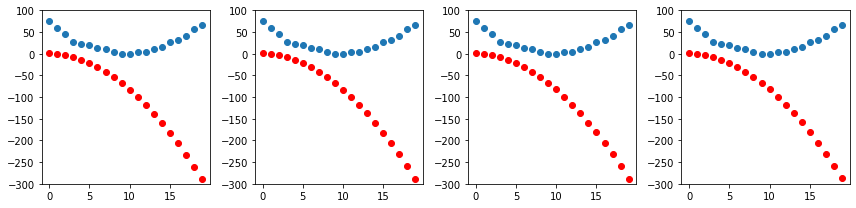

In [95]:
_, axs = plt.subplots(1,4,figsize=(12, 3))
for ax in axs: show_preds(apply_step(params, False), ax)

plt.tight_layout()

In [96]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [97]:
train_y = tensor([1] * len(threes) + [0] * len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [98]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [99]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1] * len(valid_3_tens) + [0] * len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [102]:
def init_params(size, std=1.0): return (torch.randn(size) * std).requires_grad_()

In [103]:
weights = init_params((28*28*1))

In [104]:
bias = init_params(1)

In [105]:
(train_x[0] * weights.T).sum() + bias

tensor([-13.2578], grad_fn=<AddBackward0>)

In [106]:
def linear1(xb): return xb@weights + bias

preds = linear1(train_x)
preds

tensor([-13.2578,  -4.6854, -12.4631,  ..., -12.4171,   2.4253,   1.5262], grad_fn=<AddBackward0>)

In [107]:
corrects = (preds > .5).float() == train_y
corrects

tensor([[False, False, False,  ..., False,  True,  True],
        [False, False, False,  ..., False,  True,  True],
        [False, False, False,  ..., False,  True,  True],
        ...,
        [ True,  True,  True,  ...,  True, False, False],
        [ True,  True,  True,  ...,  True, False, False],
        [ True,  True,  True,  ...,  True, False, False]])

In [108]:
corrects.float().mean().item()

0.503397524356842

In [109]:
weights[0] *= 1.0001

In [110]:
preds = linear1(train_x)
((preds > 0.0).float() == train_y).float().mean().item()

0.503187358379364

In [111]:
trgts = tensor([1,0,1])
prds = tensor([.9, .4, .2])

In [112]:
def mnist_loss(predictions, targets):
    return torch.where(targets == 1, 1-predictions, predictions).mean()

In [113]:
torch.where(trgts == 1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [114]:
mnist_loss(prds, trgts)

tensor(0.4333)

In [115]:
mnist_loss(tensor([.9, .4, .8]), trgts)

tensor(0.2333)

In [116]:
def sigmoid(x): return 1/(1+torch.exp(-x))

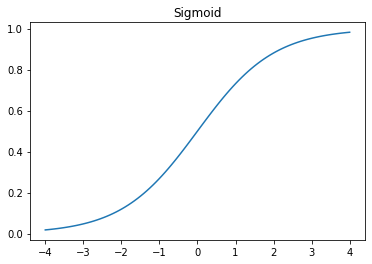

In [117]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [118]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()

    return torch.where(targets == 1, 1-predictions, predictions).mean()

In [120]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [121]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [122]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

In [124]:
weights = init_params((28*28, 1))
bias = init_params(1)

In [125]:
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [127]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [128]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [129]:
preds = linear1(batch)
preds

tensor([[-4.9576],
        [ 2.1127],
        [ 1.3012],
        [-6.5354]], grad_fn=<AddBackward0>)

In [130]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.5784, grad_fn=<MeanBackward0>)

In [131]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0098), tensor([-0.0682]))

In [132]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [133]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0195), tensor([-0.1364]))

In [134]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0293), tensor([-0.2046]))